In this (very) short blog post I will be discussing how we can use [Google's My Maps](https://www.google.com/maps/about/mymaps/) to draw a polygon on a map and export it. I will then show you how to load this exported map polygon into python and check if a given point lies within the polygon (a point-in-polygon calculation) calculation.

This sort of thing can be incredibly useful if you are building any app/script that will pull latitude and longitude information from an API and make some decision based on that. An example of this would be scraping data from a property listings website, and generating alerts for properties which fall within an area you want to live.

# Create a map polygon using My Maps 

Before we get started with the Python side of things, we will begin by drawing a polygon on a map using [My Maps](https://www.google.com/maps/about/mymaps/). To Start we can use the "draw a line" option on the top left of the map to draw a basic rectangle around the area you want to draw your polygon on.

![alt text](images/initial_rectangle.png "Initial rectangle")

From here, you can use the white circles along the line to reshape the rectangle into a polygon of your choosing. In my example below I have drawn a polygon around an area surrounding Dublin City Centre.

![alt text](images/final_polygon.png "Final Polygon")

Once you are happy with your polygon you can export the map layer using the "Export to KML/KMZ" button.

![alt text](images/show_export_button.png "Export button")

Note: Be sure to check the "export as KML instead of KMZ" option when exporting your polygon layer.

![alt text](images/export_as_kml.png "Export button")

# Some installations 

Now that we have our map polygon created and saved locally, we are ready to get stuck into the coding side of things.

Since we are dealing with geometric data, we will need to install some libraires to assist us with understanding the data, the first library we will need to install is [GDAL](https://gdal.org/). I will not cover the entire installation process for this library here, however instructions can be found for your operating system at the following locations: 
- [Windows/Linux](https://pypi.org/project/GDAL/) 
- [MacOS](https://medium.com/@vascofernandes_13322/how-to-install-gdal-on-macos-6a76fb5e24a4).

Once GDAL is installed, you will also need to install the [osgeo](https://www.osgeo.org/) and [geotable](https://pypi.org/project/geotable/) packages  however these can be easily installed via pip.

In [14]:
#! pip3 install osgeo
#! pip3 install geotable

# Load our polygon from KML using Geotable 

Once we have the installs done, we can import our `.kml` file using the `geotable.load()` function. This will load the polgon shape data, as well as some metadata about our layer into a `GeoTable` object

In [5]:
import geotable
t = geotable.load('map_polygon.kml')
t

,Name,Description,geometry_object,geometry_layer,geometry_proj4
0,daft_polygon,,"POLYGON Z ((-6.2939628 53.3476165 0, -6.296902...",Untitled layer,+proj=longlat +datum=WGS84 +no_defs


From here we can use the `geometries` property of this object to access our polygon and render it nicely in Jupyter!

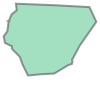

In [19]:
t.geometries[0]

# Check point in polygon 

Now that we have our polygon loaded, we can perform some simple point-in-polygon calculations. To do this we will use the [shapely](https://pypi.org/project/Shapely/) library to create a `Point` object. From here we can use the `contains` method of our polygon to check if the point we passed in are inside our polygon.

It's worth noting that when creating the `Point` object it expects the input in long, lat `(x, y)` format instead of lat, long `y, x` which is often returned when searching for coordinates.

In [7]:
#! pip3 install shapely

In [7]:
from shapely.geometry import Point
sample_location_in_polygon = Point(-6.263387, 53.344357) # Dublin city
sample_point_not_in_polygon = Point(-6.929850, 53.642509) # Random location in Meath

print(f"Dublin point in poly: {t.geometries[0].contains(sample_location_in_polygon)}")
print(f"Meath point in poly: {t.geometries[0].contains(sample_point_not_in_polygon)}")

Dublin point in poly: True
Meath point in poly: False
